In [53]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import string
import re
import nltk
nltk.download('stopwords')

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\salon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('Movie_dataset.csv', encoding='unicode_escape')

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), object(8)
memory usage: 486.3+ KB


In [4]:
df.dropna(inplace=True)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [5]:
df.isnull().sum() #Removed the NaN values

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

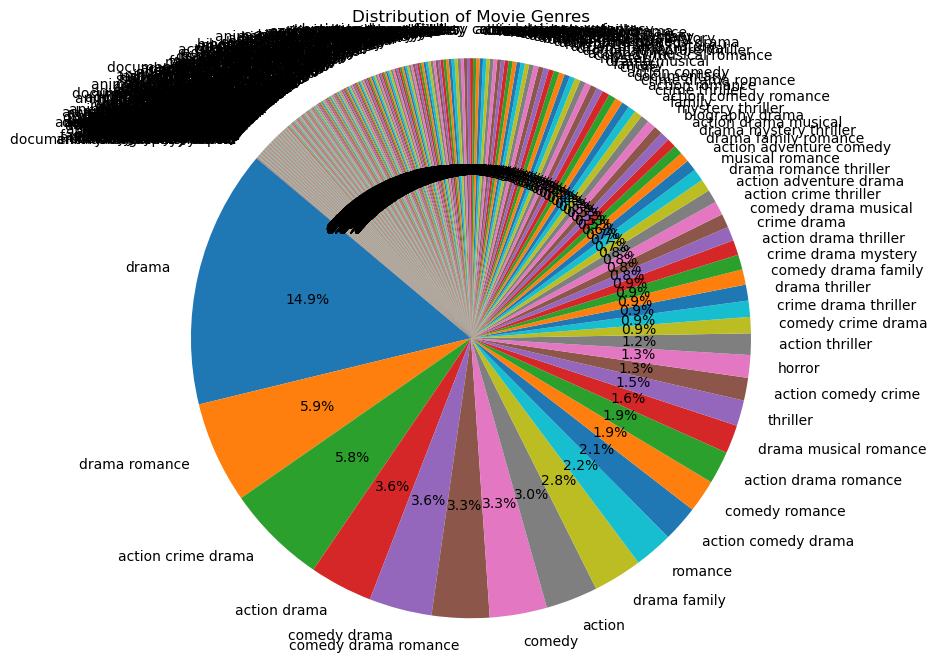

In [57]:
# Group by genre and count the number of movies in each genre
genre_counts = df['Genre'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Movie Genres')
plt.show()

In [25]:
def clean(review):
    
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    
    return review

In [29]:
df['Genre'] = df['Genre'].apply(clean)
df.head(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,comedy romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,comedy drama musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [30]:
df['Director'] = df['Director'].apply(clean)
df.head(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,drama,7.0,8,gaurav bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,comedy romance,4.4,35,ovais khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,comedy drama musical,4.7,827,rahul rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [31]:
df['Actor 1'] = df['Actor 1'].apply(clean)
df.head(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,drama,7.0,8,gaurav bakshi,rasika dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,comedy romance,4.4,35,ovais khan,prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,comedy drama musical,4.7,827,rahul rawail,bobby deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [32]:
df['Actor 2'] = df['Actor 2'].apply(clean)
df.head(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,drama,7.0,8,gaurav bakshi,rasika dugal,vivek ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,comedy romance,4.4,35,ovais khan,prateik,ishita raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,comedy drama musical,4.7,827,rahul rawail,bobby deol,aishwarya rai bachchan,Shammi Kapoor


In [33]:
df['Actor 3'] = df['Actor 3'].apply(clean)
df.head(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,drama,7.0,8,gaurav bakshi,rasika dugal,vivek ghamande,arvind jangid
3,#Yaaram,-2019.0,110 min,comedy romance,4.4,35,ovais khan,prateik,ishita raj,siddhant kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,comedy drama musical,4.7,827,rahul rawail,bobby deol,aishwarya rai bachchan,shammi kapoor


<Axes: ylabel='Rating'>

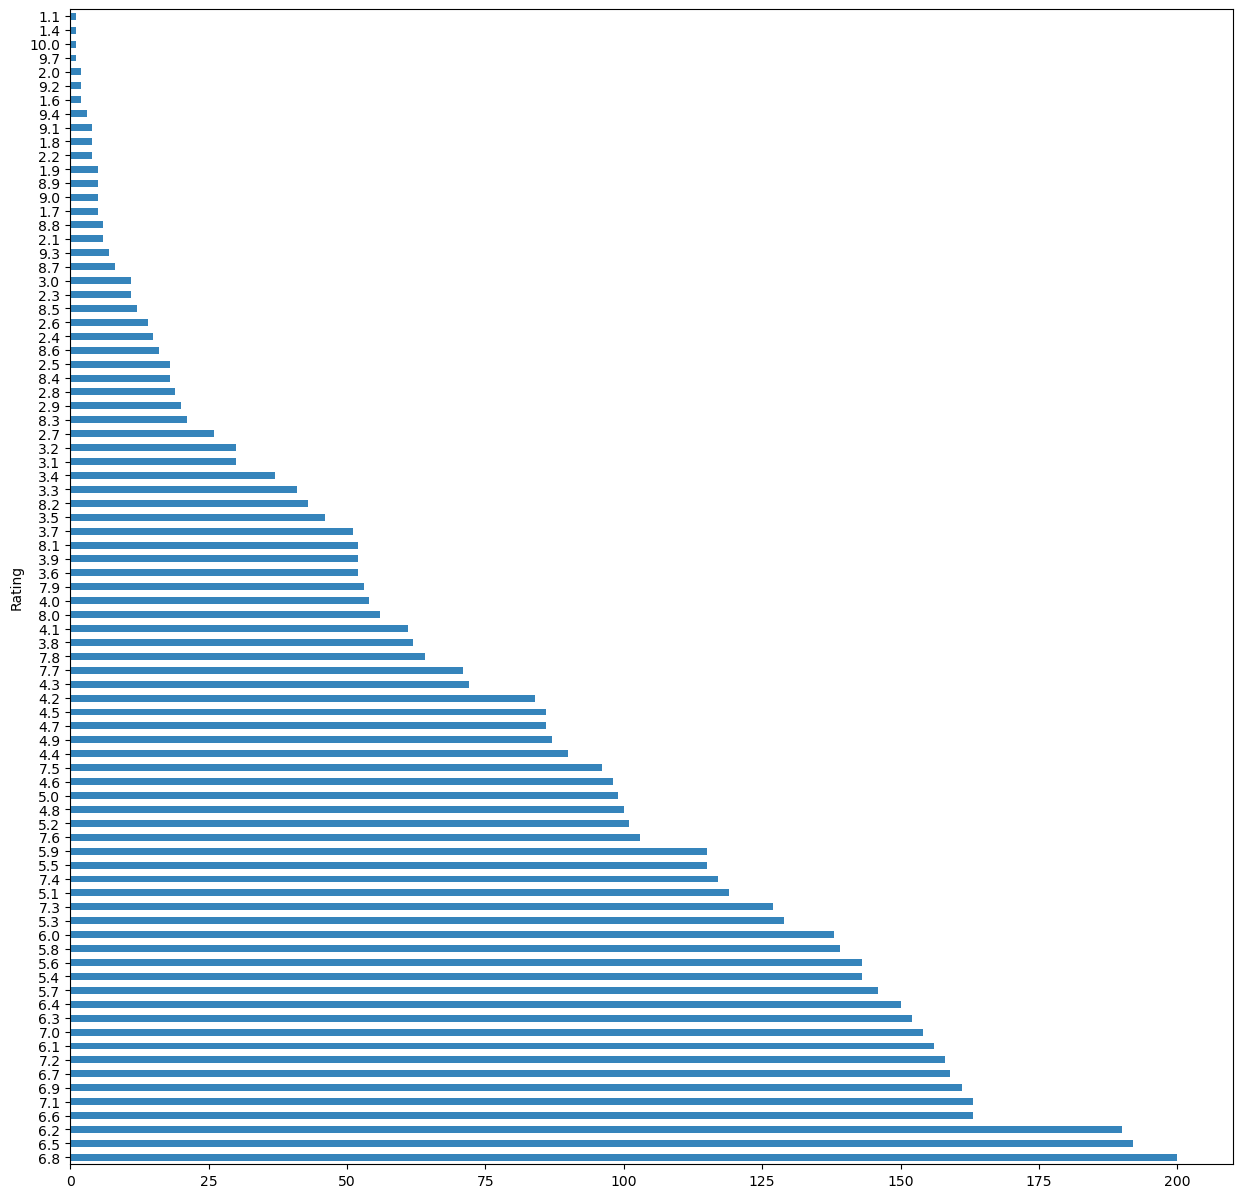

In [51]:
#Visualizing Ratings given by users
df['Rating'].value_counts().plot(kind='barh',alpha=0.9,figsize=(15,15))

In [34]:
# Selecting features and target
X = df[['Genre', 'Director', 'Votes','Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Define the column transformer for preprocessing
categorical_features = ['Genre', 'Director','Actor 1', 'Actor 2', 'Actor 3']
numerical_features = ['Votes']

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        # Add transformers for numerical features if needed
    ]
)

In [38]:
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [39]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [40]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.976332597173145
R-squared: 0.12496632638151584


In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [48]:
# Define the model
model = RandomForestRegressor(random_state=42)

# Create a pipeline that includes preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=50, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_


In [50]:
# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.962173518061359
R-squared: 0.18563409115696872


*Thus we see a slight improvement after hyperparameter tuning with RandomizedSearchCV.*
Here’s the explanation:

**Mean Absolute Error (MAE):** The MAE has decreased slightly from approximately 0.976 to 0.962. This indicates that the average error in predicting movie ratings has been reduced by a small margin.

**R-squared (R²):** The R-squared value has increased from approximately 0.125 to 0.186. This means that the model is now able to explain about 18.6% of the variance in movie ratings, compared to 12.5% before tuning.

Although the improvement is marginal, it suggests that hyperparameter tuning has had a positive impact. 